## Assessment of `Geoplanar`


### Example US and Canada

### Comparing Changes in Geoms Areas

In this notebook we look at the changes in areas of geometries after the application of `geoplanar`. 

- Finding the area
- Comparsion of area

In [1]:
import geoplanar
import geopandas as gpd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal


In [4]:
import pandas as pd

### Data Retrieval

In [5]:
npe = gpd.read_parquet("../../geoplanar/datasets/uscan/nonplanar_enforced.parquet") #non planar enforced data


In [6]:
pe = gpd.read_parquet("../../geoplanar/datasets/uscan/planar_enforced.parquet") # planar enforced


In [7]:
# reseting the coordinate reference system
npe = npe.set_crs('epsg:3857')
pe= pe.set_crs('epsg:3857')

### Area of Non planar Enforced data and planar enforced data


- Check all areas before and after geoplanar
- Compare /Contrast
- Explicitly state which ones changed

In [8]:
non_planar_enforced_area = npe
planar_enforced_area = pe

In [9]:
non_planar_enforced_area = non_planar_enforced_area.set_crs('epsg:3857')
planar_enforced_area= planar_enforced_area.set_crs('epsg:3857')

In [10]:
non_planar_enforced_area["area"] = non_planar_enforced_area['geometry'].area

In [11]:
print(non_planar_enforced_area.area)

0      15.543974
1       0.058636
2       0.000533
3      20.749831
4      45.131677
         ...    
59    136.017824
60      0.670316
61    206.184961
62     90.424490
63     87.600875
Length: 64, dtype: float64


In [12]:
planar_enforced_area["area"] = planar_enforced_area['geometry'].area

In [13]:
print(planar_enforced_area.area)

0      15.543974
1       0.058636
2       0.000533
3      20.750731
4      45.131687
         ...    
59    136.010019
60      0.670316
61    206.177792
62     90.424490
63     87.600875
Length: 64, dtype: float64


### Rounding Off Areas of the Geometries

In [14]:
non_planar_enforced_area["area"] = non_planar_enforced_area['geometry'].area.round(decimals = 3) # round off to 3 decimals

In [15]:
planar_enforced_area["area"] = planar_enforced_area['geometry'].area.round(decimals = 3)

## Plotting the areas for non planar enforced data

Text(-0.05, 0.5, 'Non Planar Enforced Areas of Polygons ')

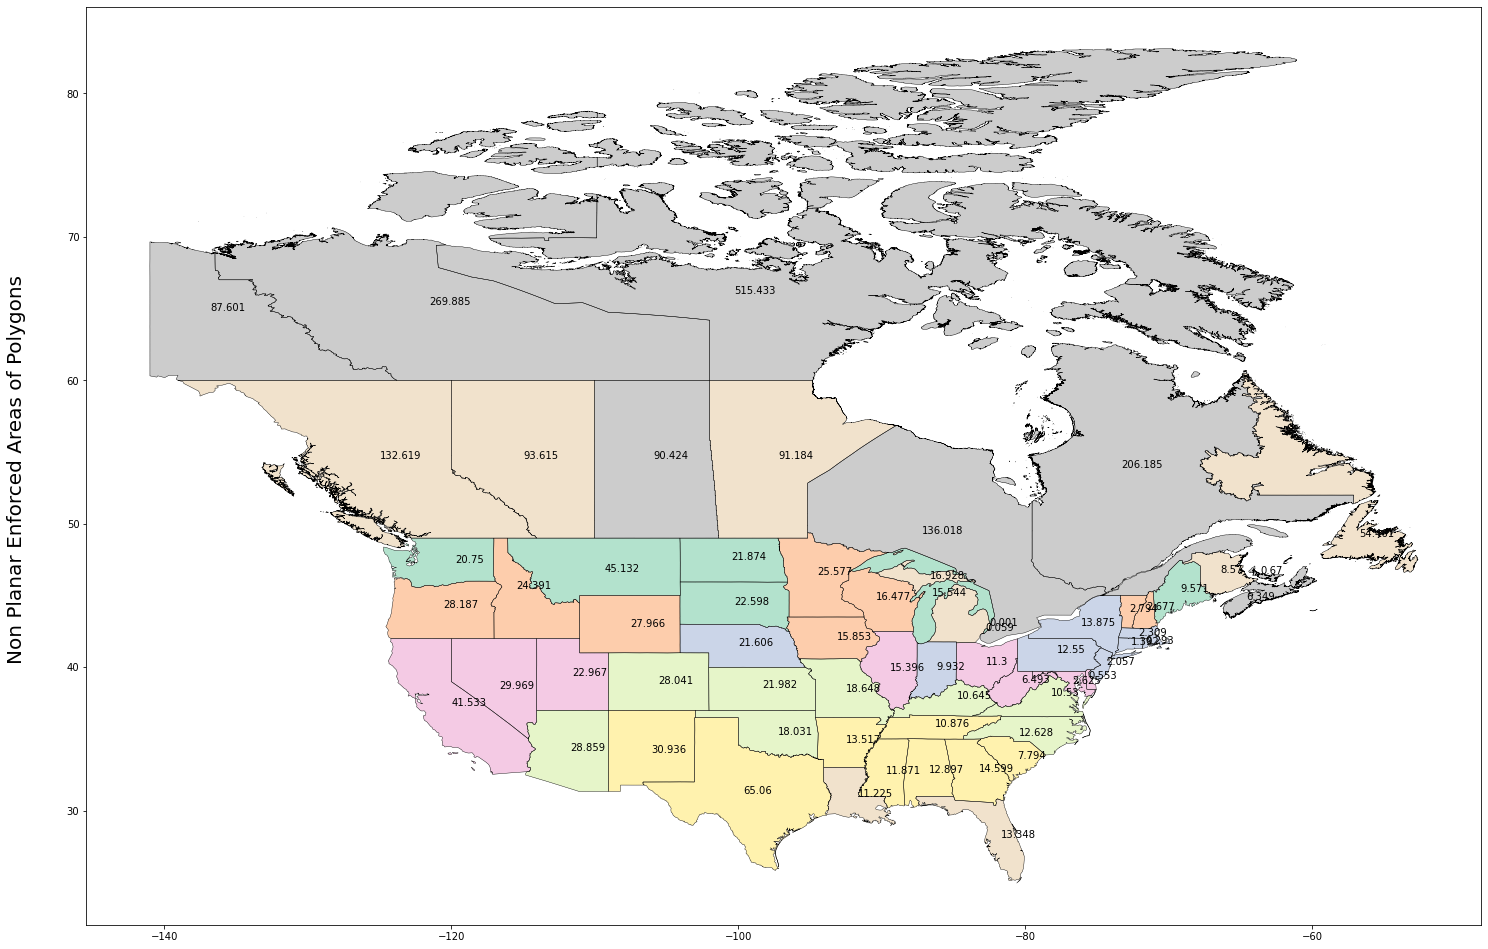

In [16]:
import matplotlib.pyplot as plt
non_planar_enforced_area['coords'] = non_planar_enforced_area['geometry'].apply(lambda x: x.representative_point().coords[:])
non_planar_enforced_area['coords'] = [coords[0] for coords in non_planar_enforced_area['coords']]
fig, ax = plt.subplots(figsize = (25,20))

non_planar_enforced_area.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
non_planar_enforced_area.boundary.plot(ax=ax, color='Black', linewidth=.4)
                              
for idx, row in non_planar_enforced_area.iterrows():
   plt.annotate(text=row['area'], xy=row['coords'] )
ax.text(-0.05, 0.5, "Non Planar Enforced Areas of Polygons ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

## Plotting the areas for planar enforced data

Text(-0.05, 0.5, 'Planar Enforced Areas of Polygons ')

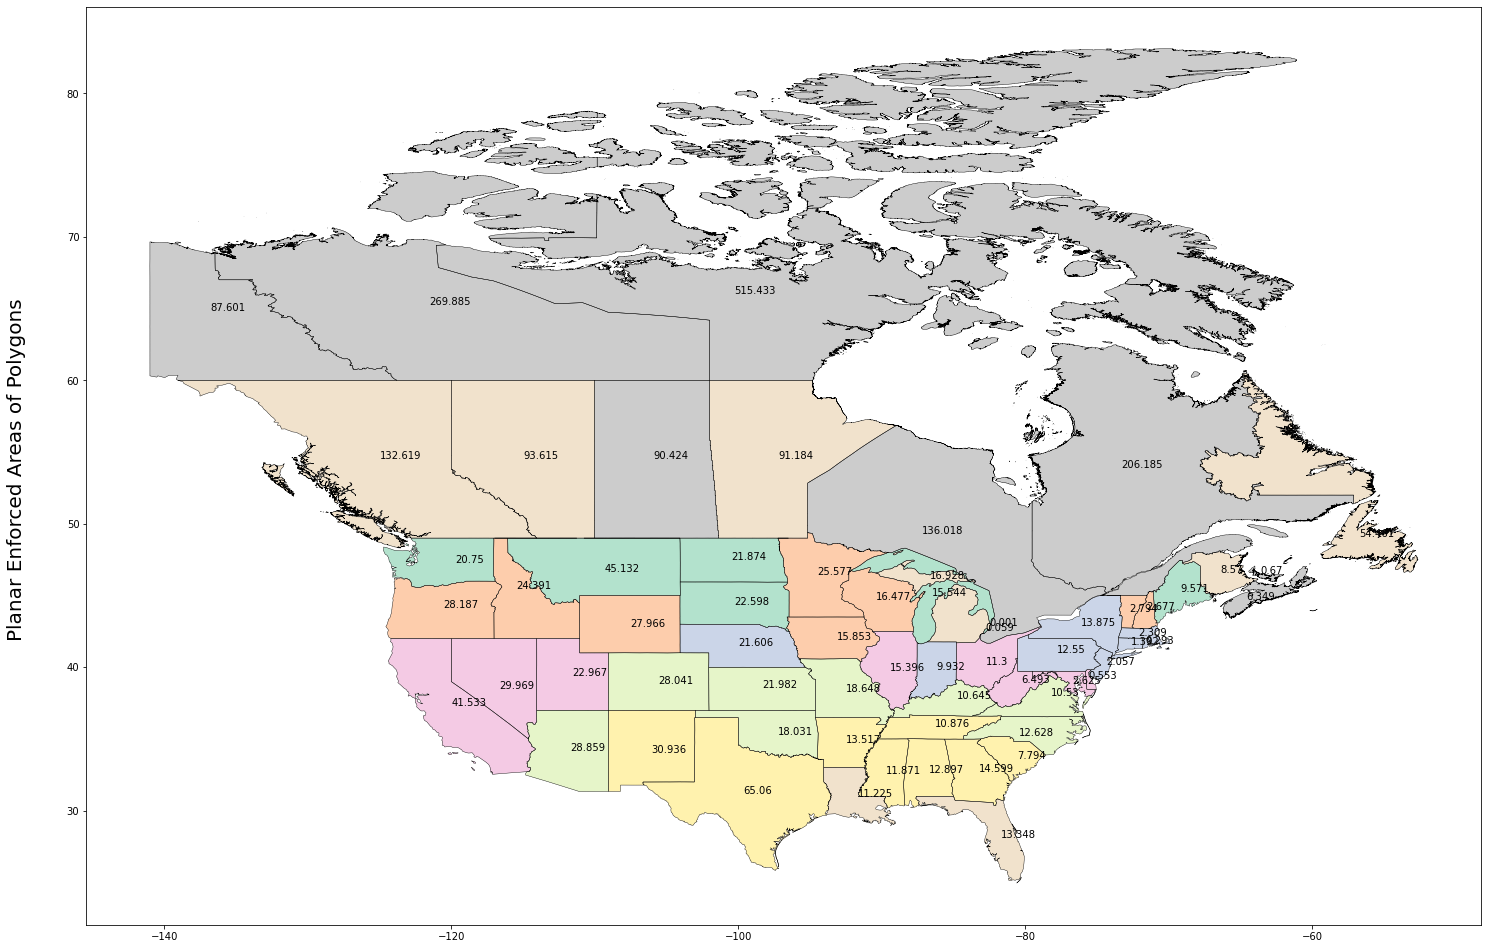

In [17]:

planar_enforced_area['coords'] = non_planar_enforced_area['geometry'].apply(lambda x: x.representative_point().coords[:])
planar_enforced_area['coords'] = [coords[0] for coords in non_planar_enforced_area['coords']]
fig, ax = plt.subplots(figsize = (25,20))

planar_enforced_area.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
planar_enforced_area.boundary.plot(ax=ax, color='Black', linewidth=.4)
                              
for idx, row in non_planar_enforced_area.iterrows():
   plt.annotate(text=row['area'], xy=row['coords'])
ax.text(-0.05, 0.5, "Planar Enforced Areas of Polygons ", transform=ax.transAxes,
        fontsize=20, color='black', alpha=1,
        ha='center', va='center', rotation='90')

##  Comparison of Areas

In [18]:
planar_enforced_area['area'].isin(non_planar_enforced_area['area']).value_counts()

True     51
False    13
Name: area, dtype: int64

In [19]:
planar_enforced_area.geometry.geom_equals_exact(non_planar_enforced_area.geometry, tolerance=0.01).value_counts()
#  changing tolerance/ Decimal place presion used when testing for approximate equality)

False    52
True     12
dtype: int64

In [20]:
planar_enforced_area.geometry.geom_equals_exact(non_planar_enforced_area.geometry, tolerance=0.7).value_counts()
#  changing tolerance/ Decimal place presion used when testing for approximate equality)

False    48
True     16
dtype: int64

### Identify the Areas of Geom  SAME for both data sets

In [21]:
df_common = planar_enforced_area.loc[planar_enforced_area['area'].isin(non_planar_enforced_area['area'])]

<AxesSubplot:>

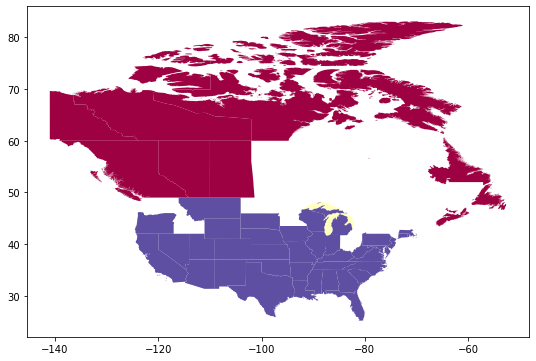

In [22]:
df_common.plot(column='COUNTRY',cmap='Spectral', figsize=(9, 9)) # ploting the polygons that have areas equal before and after groplanar


### New Data Frame

In order to compare the areas of the planar an non planar enforced data, we can put them in a separate dataframe. We can round the areas to a certain decimal points based on the researcher preference and test the change. The areas below have been rounded off to 5 decimal points 

In [23]:
data = planar_enforced_area.area.round(decimals = 5)
df = pd.DataFrame(data , columns = ['planar enforced area'])


In [24]:
df["non planar enforced area"]= non_planar_enforced_area.area.round(decimals = 5)

In [25]:
df['difference'] = df['planar enforced area'] - df['non planar enforced area'] #taking the difference

In [26]:
df.tail(20)

,planar enforced area,non planar enforced area,difference
44,11.87099,11.87099,0.00000
45,14.59880,14.59880,0.00000
46,7.79440,7.79440,0.00000
47,13.51734,13.51734,0.00000
48,11.22465,11.22465,0.00000
49,13.34771,13.34771,0.00000
50,16.92796,16.92796,0.00000
51,93.61462,93.61462,0.00000
52,132.61887,132.61889,-0.00002
53,91.18316,91.18449,-0.00133


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

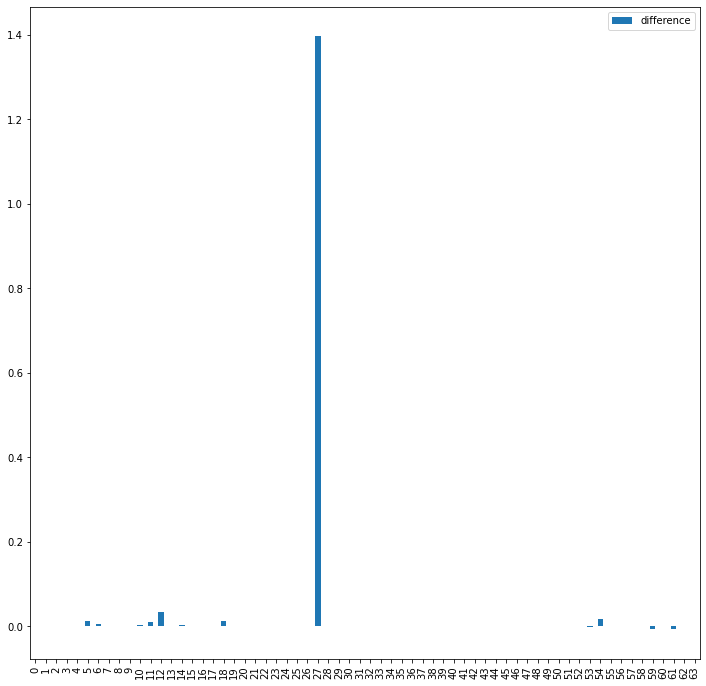

In [27]:
plt.figure(); # plotting the differences 
df[['difference' ]].plot.bar(figsize=(12, 12))

Here we can see the changes in the areas, the 27 polygon (Ohio) has the most change (see notebook on centriods) 

### Ratio of PE and NPE AREAS

In [28]:
df['pe_area_over_npe_area'] = df['planar enforced area'] / df['non planar enforced area']
df

,planar enforced area,non planar enforced area,difference,pe_area_over_npe_area
0,15.54397,15.54397,0.00000,1.000000
1,0.05864,0.05864,0.00000,1.000000
2,0.00053,0.00053,0.00000,1.000000
3,20.75073,20.74983,0.00090,1.000043
4,45.13169,45.13168,0.00001,1.000000
...,...,...,...,...
59,136.01002,136.01782,-0.00780,0.999943
60,0.67032,0.67032,0.00000,1.000000
61,206.17779,206.18496,-0.00717,0.999965
62,90.42449,90.42449,0.00000,1.000000


### Subset Area Ratio greater then 1

In [29]:
df2 = df[df.pe_area_over_npe_area > 1.000000] # subset to look at areas increased
df2.shape

(11, 4)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

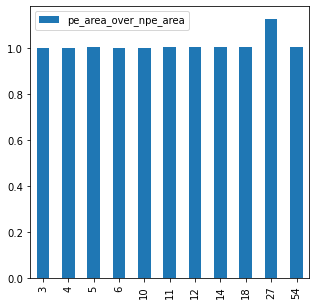

In [30]:
import matplotlib.pyplot as plt
plt.figure(); # plotting ratio of area>1 
df2[['pe_area_over_npe_area' ]].plot.bar(figsize=(5, 5))

### Subset Area Ratio less then 1

In [31]:
df3 = df[df.pe_area_over_npe_area < 1.000000]
df3.shape # subset to look at areas decreased

(4, 4)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

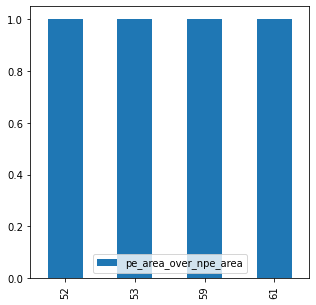

In [32]:
plt.figure(); # ratio of area <1
df3[['pe_area_over_npe_area' ]].plot.bar(figsize=(5, 5))

Most of the areas are changing by a small fraction that is not visible from the bar graph.

## Plotting Areas that Increased or Decreased 

The two bar graph above show the which polygon/multi polgon has changed. For example polygons 52,53, 59 and 61 had marginal reduction in areas. We can find the details of these polygons by:

In [33]:
planar_enforced_area.iloc[53]

level_0                                                      50
geometry      (POLYGON ((-95.12908936 49.3717041, -95.122375...
COUNTRY                                                  CANADA
index                                                       2.0
AREA                                                        NaN
PERIMETER                                                   NaN
STATE_                                                      NaN
STATE_ID                                                    NaN
STATE_NAME                                                 None
STATE_FIPS                                                 None
SUB_REGION                                                 None
STATE_ABBR                                                 None
GID_0                                                       CAN
NAME_0                                                   Canada
GID_1                                                   CAN.3_1
NAME_1                                  

In [34]:
non_planar_enforced_area.iloc[53]

level_0                                                      50
geometry      (POLYGON ((-101.73500061 53.53504181, -101.735...
COUNTRY                                                  CANADA
index                                                       2.0
AREA                                                        NaN
PERIMETER                                                   NaN
STATE_                                                      NaN
STATE_ID                                                    NaN
STATE_NAME                                                 None
STATE_FIPS                                                 None
SUB_REGION                                                 None
STATE_ABBR                                                 None
GID_0                                                       CAN
NAME_0                                                   Canada
GID_1                                                   CAN.3_1
NAME_1                                  

Based on the bar graphs we can plot the geometries. First we look geometries where the planar enforced areas is greater than non planar enforced areas i.e. the ratio of area >1.

### RATIO OF AREAS >1

In [35]:
ratio_area_greater_1 = planar_enforced_area.iloc[['3','4','5','6', '10', '11', '12', '14','18', '27',
                                          '54']]

<AxesSubplot:>

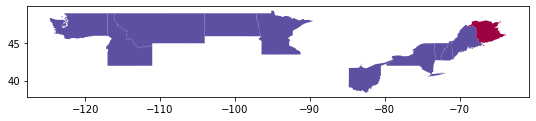

In [36]:
ratio_area_greater_1.plot(column= 'COUNTRY', cmap='Spectral', figsize=(9, 9))

The areas have increased is mostly US states ( note: after rounding to 5 decimal points). Hence the geometries of states in US increased slightly as a result of planar enforcement and application of geoplanar.

### RATIO OF AREAS < 1

In [37]:
ratio_area_less_1 = planar_enforced_area.iloc[[ '52', '53',  '59','61']]

<AxesSubplot:>

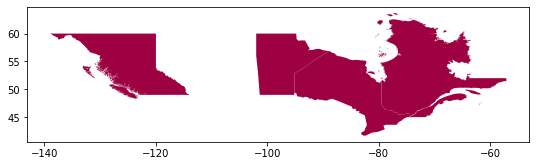

In [38]:
ratio_area_less_1.plot(column= 'COUNTRY', cmap='Spectral', figsize=(9, 9))

The areas of geometries on the Canadian side decrease by a slight amount after application of geoplanar (note: based on rounding off to 5 decimal points, results may vary with other specification)